# Logistic Regression

Boise State University\
Department of Computer Science\
CS 334 Algorithms of Machine Learning\
Conrad Kennington\
Fall 2020

Logistic Regresion: 
- Defined by the Logit (also called the Sigmoid) function.
- sigmoid function always outputs values between 0 and 1.
- Useful for binary classification: on/off yes/no true/false

For example:
- Whether a transaction is fraud or not.
- Whether it will rain.
- Whether a horse will win a race.
- Whether a tumor is benign or malignant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

Logistic regression takes input and returns an output of probability, a value between 0 and 1.\
How does a Logistic Regression do that?\
With the help of a function called a logistic function or most commonly known as a sigmoid.\
e = Euler's number which is 2.71828\
x is the value of the sigmoid's midpoint on the x-axis.

$$ sigmoid(x) = \frac{1}{1+e^{-x}} $$

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Let's graph a sigmoid curve

In [3]:
# Generates -10 to +10 with increment 0.2 (-10.0 , -9.8 ,...0,0.2,0.4,...9.8)
x = np.arange(-10., 10., 0.2)
x.shape # 100 values along the x axis.

(100,)

In [4]:
y = []
# Sigmoid returns the y for each given value along the x axis
for item in x:
    y.append(sigmoid(item))

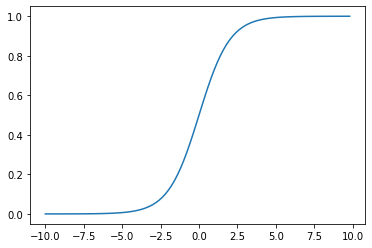

In [5]:
plt.plot(x,y)
plt.show()

### Observe that if 'x' is very negative output is almost zero and if 'x' is very positive its almost one. But when 'x' is 0 , y is 0.5

### Cost function for Logistic Regression

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i})) $$

### Note that the cost function used in logistic regression is different than the one used in linear regression.

In [6]:
# Cost function for logistic regression.
# Uses something called the "Maximum Liklihood Estimation"
# The @ in the middle of a Python line is shorthand for matrix multiplication.
# It's moving the curve from left to right, figuring out the best liklihood for all data points for 1/0
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [7]:
# Apply the cost function to gradient descent.
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [8]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

## Randomize and plot a bunch of data as two distinct classes.

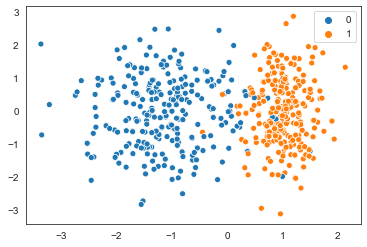

In [9]:
# 500 random samples
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

## Linear Regression vs Logistic Regression

Linear Regression Output: a number representing a position on a plotted line.\
Logistic Regression Output: A probability that a new sample belongs to one class or the other.

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



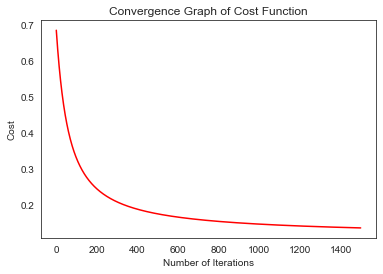

In [10]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03
initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

### How Good is our model at predicting the correct class?

In [11]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.966


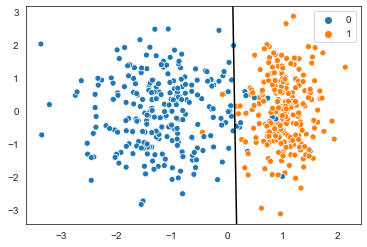

In [12]:

slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

# Show curve

Using seaborn and scikit

In [20]:
labels = [val for sublist in y for val in sublist]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, labels, test_size=0.25, random_state=0)

In [21]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [22]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.968


In [23]:
# Grab only one of the features and plot it for fun
X_1_dim = [i[1] for i in X]

[]

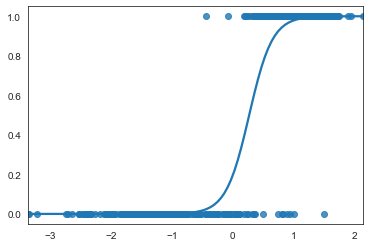

In [19]:
import seaborn as sns
sns.regplot(x=X_1_dim, y=y, data=X, logistic=True, ci=None)
plt.plot()